<a href="https://colab.research.google.com/github/MinhDat13/Bai_tap_AI/blob/main/Bodyfat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd 

ulr = 'bodyfat.csv'
data = pd.read_csv(ulr)
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


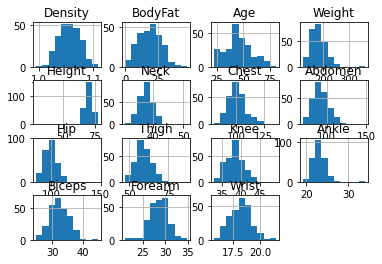

In [35]:
import matplotlib.pyplot as plt
data.hist()
plt.show()
correlation = data.corr()

<Axes: >

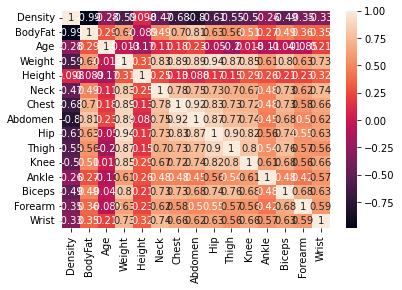

In [36]:
import seaborn as sns
sns.heatmap(correlation,annot = True)

In [37]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['Weight']), y = data['BodyFat'])
print('he so intercep la: ',model.intercept_)
print('he so coeff', model.coef_)
model.score(X=pd.DataFrame(data['Weight']), y = data['BodyFat'])

he so intercep la:  -12.051578918185609
he so coeff [0.17438858]


0.37505091009386415

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


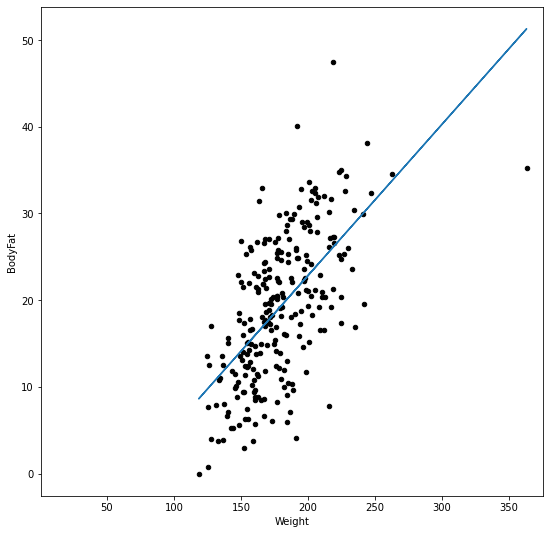

In [38]:
y_pred = model.predict(X=pd.DataFrame(data['Weight']))
data.plot(kind = 'scatter',x = 'Weight', y = 'BodyFat', figsize = (9,9), color = 'black', xlim = (0.7))
plt.plot(data['Weight'], y_pred,)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


intercept: -82.37626089292249
coeff: [ 1.30034553e+00 -6.59261256e-03  1.72813651e-05 -1.79840468e-08]
do chinh xac 0.39987364443819107


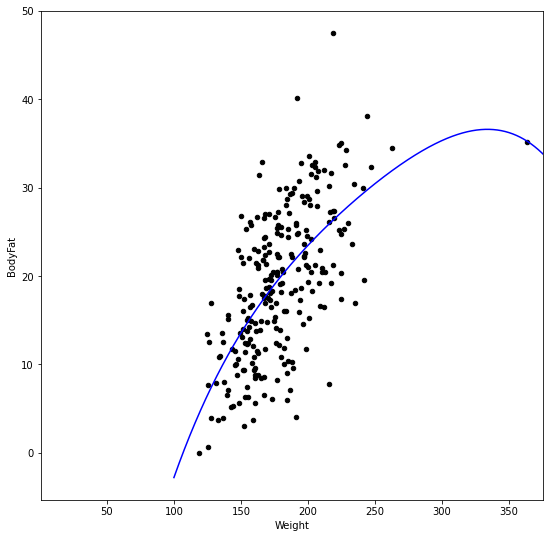

In [39]:
import numpy as np
model = linear_model.LinearRegression()
X=pd.DataFrame([data['Weight'],data['Weight']**2,data['Weight']**3,data['Weight']**4]).T
model.fit(X, y = data['BodyFat'])
range=np.arange(100,400,0.1)
X_range=pd.DataFrame([range,range**2,range**3,range**4]).T
y_pred=model.predict(X=X_range)
data.plot(kind='scatter',x='Weight',y='BodyFat',figsize=(9,9),color='black',xlim=(0.7))
plt.plot(range,y_pred,color='blue')
print('intercept:', model.intercept_)
print('coeff:', model.coef_)
print('do chinh xac', model.score(X,y = data['BodyFat']))

In [40]:
model=linear_model.LinearRegression()
model.fit(X=data.loc[:,['Weight','Height','Age','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist']],y = data['BodyFat'])
print('Intercept của mô hình:',model.intercept_)
print('coeffient của  mô hình:',model.coef_)
print('Độ chính xác của mô hình:',model.score(X=data.loc[:,['Weight','Height','Age','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist']],y = data['BodyFat']))

Intercept của mô hình: -18.188485080984066
coeffient của  mô hình: [-0.08844468 -0.06959043  0.06207865 -0.47060001 -0.02386415  0.95477346
 -0.20754112  0.23609984  0.01528121  0.17399537  0.18160242  0.45202491
 -1.6206391 ]
Độ chính xác của mô hình: 0.749049969148275
